### Importing required Packages and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.io import show
import seaborn as sns


Loading BokehJS ...

### Reading data file

In [43]:
pd.set_option("display.max_columns",None)
df=pd.read_csv("mlb.csv")
df.head(5)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,38,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,18,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,18,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,16,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,142,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


### Checking variable type and non null count 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   salary                    352 non-null    int64  
 1   player_position           352 non-null    object 
 2   race                      352 non-null    object 
 3   team_payroll              352 non-null    int64  
 4   years_played              352 non-null    int64  
 5   games_played              352 non-null    int64  
 6   career_at_bats            352 non-null    int64  
 7   career_runs               352 non-null    int64  
 8   career_hits               352 non-null    int64  
 9   career_doubles            352 non-null    int64  
 10  career_triples            352 non-null    int64  
 11  career_homeruns           352 non-null    int64  
 12  career_runs_batted_in     352 non-null    int64  
 13  career_batting_average    352 non-null    int64  
 14  career_wal

With the help of this we can know type of data variable of all the cloumns, how many non null values are there.As we can see there are 3 columns of Float type , 16 columns of integer type and 2 columns of object type.

# 1)Display descriptive statistics on the dataset.

In [4]:
df.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,329.000000,329.000000,329.000000
mean,1.331514e+06,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,16.590909,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,72.638240,16.541950,10.819810
std,1.383952e+06,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,21.395948,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,15.249897,13.688558,9.402261
min,1.090000e+05,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.527000e+05,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,3.000000,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,67.668960,8.007545,1.962080
50%,6.750000e+05,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,9.000000,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,74.619650,14.453980,10.877800
75%,2.250000e+06,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,23.000000,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650
max,6.200000e+06,4.286600e+07,20.000000,2729.000000,10554.000000,1570.000000,3025.000000,634.000000,142.000000,432.000000,1710.000000,625.000000,1286.000000,1891.000000,1042.000000,1000.000000,94.696270,73.960030,31.037500


This command helps us to know the statistic of our data like mean, standard deviation, quartiles , min and maximum value of all the columns 

### To know Number of rows and columns

In [5]:
df.shape

(352, 21)

# 2)Check if any records in the data have any missing values; handle the missing data as appropriate

In [6]:
df.isnull().sum()

salary                       0
player_position              0
race                         0
team_payroll                 0
years_played                 0
games_played                 0
career_at_bats               0
career_runs                  0
career_hits                  0
career_doubles               0
career_triples               0
career_homeruns              0
career_runs_batted_in        0
career_batting_average       0
career_walks                 0
career_strike_outs           0
career_stolen_bases          0
career_fielding_percent      0
white_percent_in_city       23
black_percent_in_city       23
hispanic_percent_in_city    23
dtype: int64

In [7]:
white_percent_null=df["white_percent_in_city"].isnull().sum()
black_percent_null=df["black_percent_in_city"].isnull().sum()
hispanic_percent_null=df["hispanic_percent_in_city"].isnull().sum()
print(f"number of null vallues are \n White_percent_in_city={white_percent_null} \n  black_percent_in_city={black_percent_null}  \n hispanic_percent_in_city:={hispanic_percent_null}")

number of null vallues are 
 White_percent_in_city=23 
  black_percent_in_city=23  
 hispanic_percent_in_city:=23


### Filling null values 

In [8]:
df=df.dropna()
df.head(5)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


Here i have used interpolate rathen than dropping values , interpolate fills up average of previous("bfill") and next("ffill") values. Linear method used to fill null values

In [9]:
#to count number of  values
df.isnull().sum()

salary                      0
player_position             0
race                        0
team_payroll                0
years_played                0
games_played                0
career_at_bats              0
career_runs                 0
career_hits                 0
career_doubles              0
career_triples              0
career_homeruns             0
career_runs_batted_in       0
career_batting_average      0
career_walks                0
career_strike_outs          0
career_stolen_bases         0
career_fielding_percent     0
white_percent_in_city       0
black_percent_in_city       0
hispanic_percent_in_city    0
dtype: int64

As you can see there are no null values in any columns

In [10]:
#dropping duplicate values if any, inplace=True because we don't want to create new datafram , 
#applied changes to original datafrae
df.drop_duplicates(inplace=True)
df

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.87780
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.87780
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.87780
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.87780
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.87780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,312000,shortstop,white,35586456,5,439,1098,150,260,41,...,6,83,237,136,138,43,964,73.14964,13.87162,12.97875
348,275000,catcher,hispanic,35586456,2,211,700,63,183,32,...,11,64,261,29,115,0,983,73.14964,13.87162,12.97875
349,250000,thirdbase,white,35586456,3,249,828,112,176,36,...,41,110,213,94,264,10,941,73.14964,13.87162,12.97875
350,200000,secondbase,white,35586456,6,667,2087,217,510,92,...,13,168,244,137,239,20,987,73.14964,13.87162,12.97875


In [11]:
df.duplicated().sum()

0

There are no duplicate values in dataframe

# 3)Build a graph visualizing the distribution of one or more individual continuous variables of the dataset

Grouping data into desired groups

Text(0.5, 0, 'Salary')

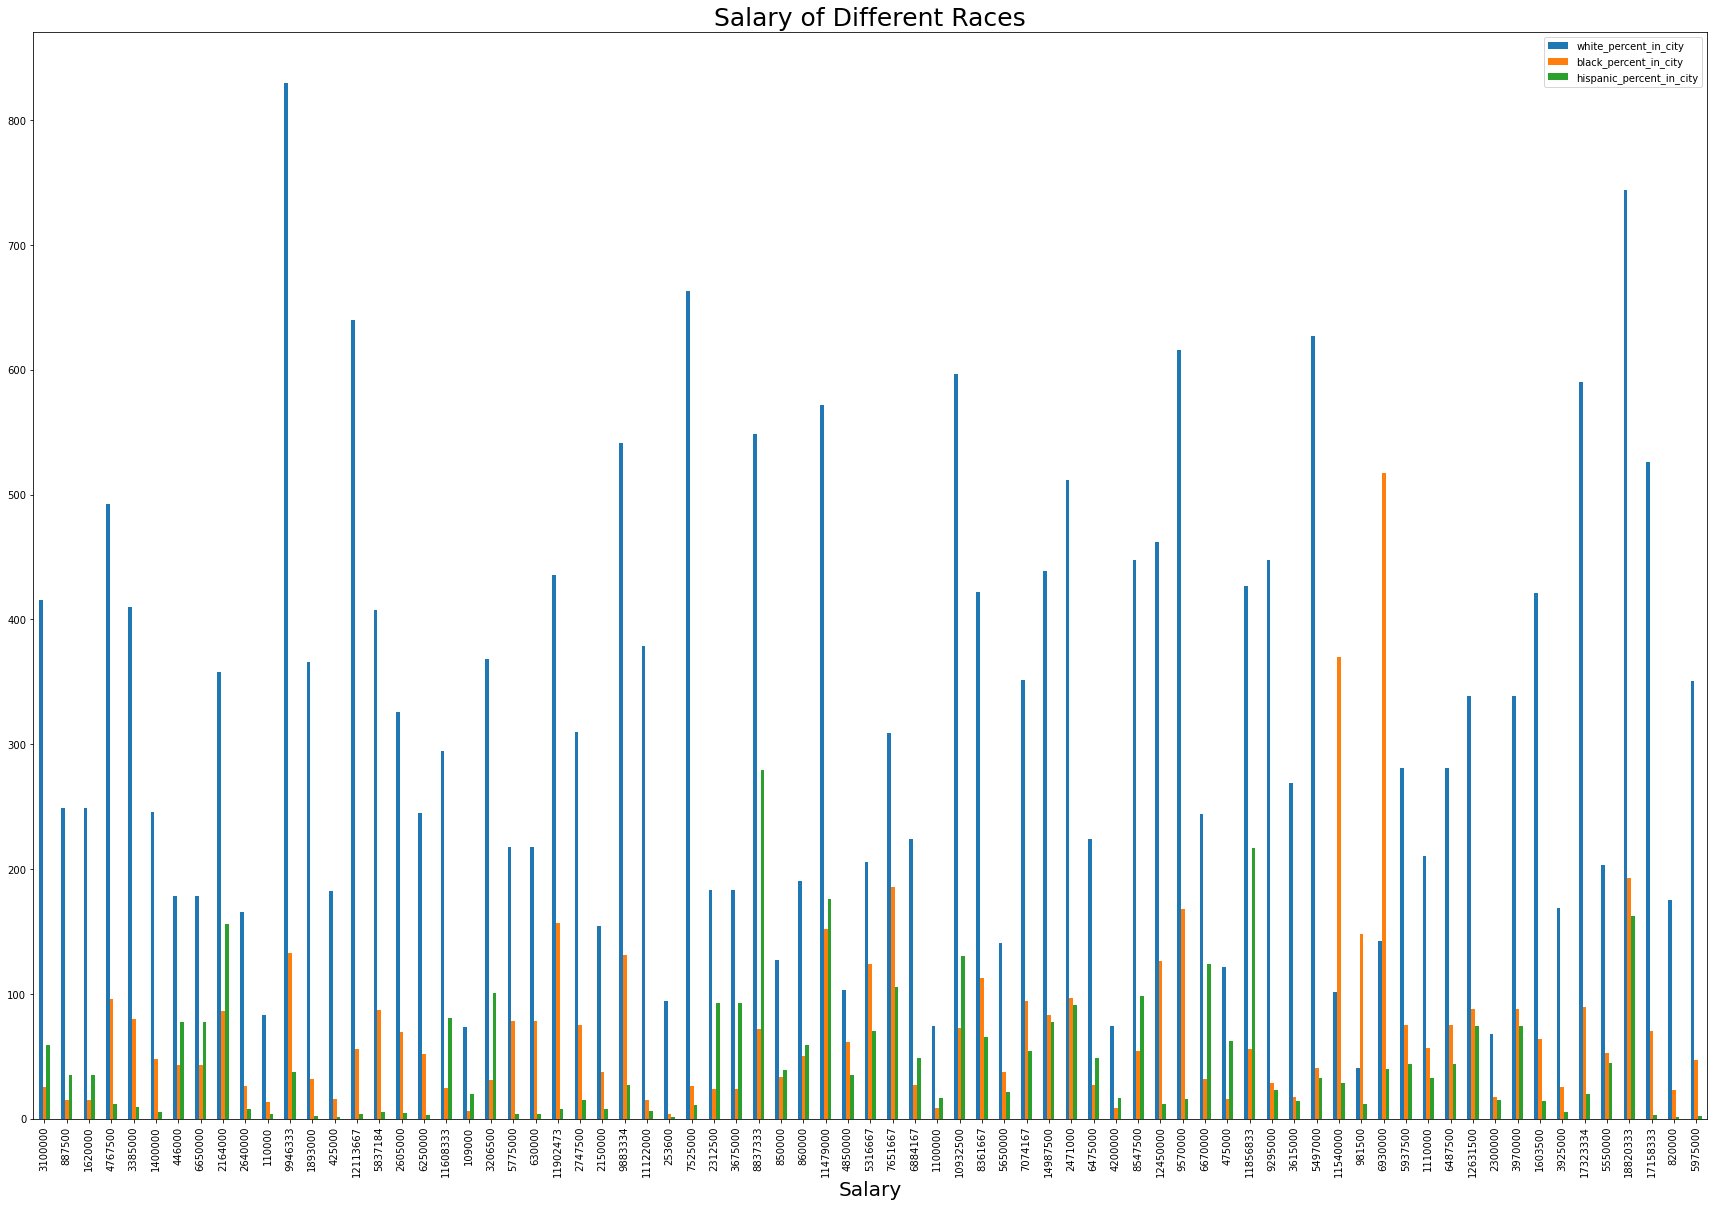

In [12]:
#Here I have grouped data on the basis of team_payroll and race using groupby function and stored values in new1 variable "
new1=df.groupby(["team_payroll","race",]).sum()
#Using column graph to display relationship of different race to team_payroll"
new1.plot(x="salary", y=["white_percent_in_city","black_percent_in_city","hispanic_percent_in_city"],
        kind="bar", figsize=(30, 20))
#Increasing title size
plt.title('Salary of Different Races', fontsize=25)
#Increasing x label size
plt.xlabel('Salary', fontsize=20)

From the above graph we can observe that salary of white_percent_in_city is more than black_percent_in_city  Hispanic_percent_in_city
has least salary

# 4)Build a graph visualizing the relationship in a pair of continuous variables. Determine the correlation between them.

In [13]:
#Creating contigency table for salary of different race
cont_table=pd.crosstab(df["salary"],df["race"])
cont_table.head(5)


race,black,hispanic,white
salary,,,
109000,3,1,2
110000,0,1,1
112000,0,0,1
112500,1,0,0
115000,1,0,1


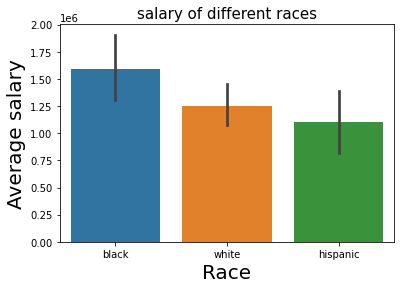

In [14]:
#using bar plot to show realations. 
sns.barplot(y = 'salary',x = 'race',data = df)
#giving title to the graph and adjusting size of the title
plt.title('salary of different races', fontsize=15)
#definfing & Increasing x label size
plt.xlabel('Race', fontsize=20)
#definfing & Increasing y label size
plt.ylabel('Average salary', fontsize=20)
#plotting the graph
plt.show()

From the above graph we can say that black race has more average salary than white race and hispanic race has least average salary

In [15]:
#now to check whether there is a signinficant relation or not between salary and black_perent_in_city
#with the help of pearson method
#we used pearson to check relation only numerical values
df["salary"].corr(df["black_percent_in_city"],method="pearson")

0.02466814190953282

Since there is NO significant relation between continuous variable "black_percent_in_city" as it R tends to 0.
However if we find the relation between discrete variable "salary" and "career_runs_batted_in" its R tends to 1 . 
its pretty obvious from below graph and R value

<AxesSubplot:title={'center':'salry from runs batted in career'}, xlabel='salary', ylabel='career_runs_batted_in'>

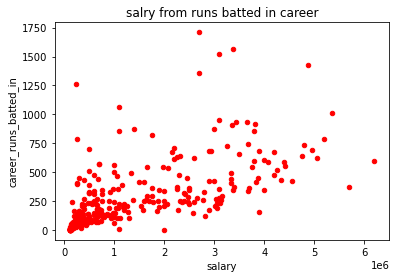

In [16]:
#used scatter plot to show kind of relation between salary and career_runs_batted_in
#in scatter plot we can define our varibles and title moreover can give color to the graph. here its red
df.plot(kind="scatter",x="salary",y="career_runs_batted_in",title="salry from runs batted in career",color="red")

In [17]:
#now we are checking whether there is a relation betwewen salary and career_runs_batted_in.
df["salary"].corr(df["career_runs_batted_in"],method="pearson")

0.6407579844227099

Here our p value is approaching towards 1 and since its above 0.5 and positive that shows there is a significant positive relation and its linear which can be depicted from above scatter  graph

In [18]:
#we can use co-relation matrix to find exact p value for different varibles 
#whether there is dependency on another variable or not
#using corr() function to find co relation
corr_matrix=df.corr()
#here I am rounding off values to 2 decimal points.
corr_matrix = df.corr().round(2)
corr_matrix.head(10)

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
salary,1.00,0.21,0.48,0.59,0.61,0.64,0.62,0.62,0.46,0.60,0.64,0.35,0.58,0.53,0.34,0.06,-0.00,0.02,-0.03
team_payroll,0.21,1.00,0.14,0.14,0.14,0.19,0.14,0.13,0.13,0.12,0.14,0.05,0.14,0.15,0.11,-0.05,-0.21,0.22,0.01
years_played,0.48,0.14,1.00,0.94,0.90,0.84,0.88,0.84,0.73,0.68,0.82,0.27,0.81,0.76,0.55,0.13,0.05,0.00,-0.08
games_played,0.59,0.14,0.94,1.00,0.99,0.94,0.98,0.94,0.81,0.77,0.92,0.35,0.91,0.83,0.60,0.11,0.07,-0.04,-0.06
career_at_bats,0.61,0.14,0.90,0.99,1.00,0.95,0.99,0.96,0.83,0.79,0.95,0.37,0.91,0.83,0.61,0.09,0.09,-0.06,-0.06
career_runs,0.64,0.19,0.84,0.94,0.95,1.00,0.96,0.93,0.85,0.76,0.90,0.39,0.91,0.77,0.68,0.08,0.08,-0.04,-0.07
career_hits,0.62,0.14,0.88,0.98,0.99,0.96,1.00,0.96,0.84,0.78,0.94,0.40,0.91,0.80,0.62,0.09,0.09,-0.06,-0.06
career_doubles,0.62,0.13,0.84,0.94,0.96,0.93,0.96,1.00,0.78,0.79,0.93,0.39,0.88,0.77,0.53,0.08,0.11,-0.07,-0.08
career_triples,0.46,0.13,0.73,0.81,0.83,0.85,0.84,0.78,1.00,0.51,0.71,0.34,0.72,0.64,0.74,0.07,0.08,-0.06,-0.05
career_homeruns,0.60,0.12,0.68,0.77,0.79,0.76,0.78,0.79,0.51,1.00,0.93,0.25,0.78,0.83,0.31,0.05,0.08,-0.06,-0.04


From the above calculated co-relation matrix we can see relations between all the variables , it goes from -1 to 1. if its 1 that means it has  postive strong relation and if its negative -1 that means strong but negative

# 5)Display unique values of a categorical variable.

In [19]:
#displaying unique values of player_postion with help of unique() function
df["player_position"].unique()

array(['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher',
       'secondbase'], dtype=object)

In [20]:
#displaying unique values of race
df["race"].unique()

array(['black', 'white', 'hispanic'], dtype=object)

In [21]:
#counting number of unique values in player_positon and race with value_counts() function
unique_postion=df["player_position"].value_counts()
unique_race=df["race"].value_counts()
print(f"Number of unique values in player_position:\n {unique_postion} \n Number of unique values in race:\n {unique_race}")

Number of unique values in player_position:
 outfield      128
catcher        48
shortstop      45
firstbase      42
secondbase     33
thirdbase      33
Name: player_position, dtype: int64 
 Number of unique values in race:
 white       167
black       102
hispanic     60
Name: race, dtype: int64


<AxesSubplot:title={'center':'Unique values in player position'}>

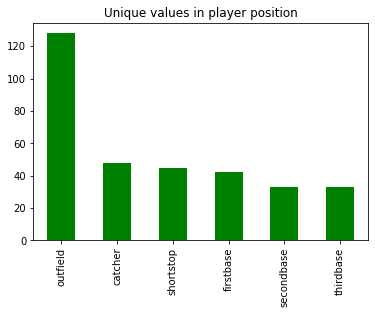

In [22]:
#with the help of bar graph we can also observe unique values in player positon
unique_postion.plot(kind="bar",title="Unique values in player position",logy=0,color="green")

From the above graph we can see outfield postion has more unique values and least in secondbase

# 6)Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them.

From the given dataframe we have  Categorical values 'race' and 'player_position'.Contingency table shows frequency distribution of varible it simply groups data and calculate frequency related to assigned variable.

In [23]:
#using crosstab() function to create contingency table between race and player position
cont_table2=pd.crosstab(df["race"],df["player_position"])
cont_table2

player_position,catcher,firstbase,outfield,secondbase,shortstop,thirdbase
race,,,,,,
black,2,10,69,6,7,8
hispanic,7,8,19,6,17,3
white,39,24,40,21,21,22


H0(null hypothesis): There is no association between race and player postion.                                                 
HA(alternative hypothesis):There is a association between race and player postion.

In [24]:

#With the help of chi-square test we can calculate whether there is a association between varibles or not
chi2,p_val,dof,expected=stats.chi2_contingency(cont_table2)
print(p_val)

1.2087075896629676e-11


Considering significance level of 5% we can see our p value:2.29e-12 is less than 0.05 that means we have to reject null hypothesis and accept alternative hypothesis.                                                
 We can say there is a association between race and player position


# 7)Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).

In [25]:
#extracting values in variable subset1 on the basis of some criteria where race is white
subset1=df[((df.career_batting_average>300) & (df.career_fielding_percent>890))
           &((df.race=="white")|(df.white_percent_in_city>60))]
subset1.head(5)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
100,1275000,firstbase,white,42668168,5,388,1220,166,371,76,...,27,152,304,113,159,25,995,87.74488,11.714250,0.540870
146,4083333,outfield,black,24557332,11,1463,5701,842,1864,278,...,59,591,327,506,291,249,986,73.64294,6.266109,20.090960
154,109000,firstbase,hispanic,24557332,1,15,23,1,7,0,...,1,5,304,1,7,0,941,73.64294,6.266109,20.090960
155,4750000,firstbase,white,34136500,7,1028,3778,605,1139,222,...,162,636,301,443,676,50,993,74.61965,9.049699,16.330650
180,3325000,outfield,white,37226584,8,831,2980,418,912,167,...,84,489,306,312,230,60,979,89.56021,5.773694,4.666095


In [26]:
#extracting values in variable subset2 on the basis of some criteria where race is "BLACK"
subset2=df[((df.career_batting_average>290) & (df.career_fielding_percent>890)) 
           &((df.race=="black")| (df.black_percent_in_city>60))]
subset2.head(5)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
21,123000,outfield,black,18297546,1,32,99,14,29,6,...,0,7,293,11,13,0,967,59.59597,14.453980,25.95005
95,5700000,shortstop,black,42668168,7,835,3122,478,924,150,...,70,368,296,273,291,148,973,87.74488,11.714250,0.54087
96,3900000,outfield,black,42668168,6,636,2091,378,626,103,...,20,158,299,218,266,151,972,87.74488,11.714250,0.54087
146,4083333,outfield,black,24557332,11,1463,5701,842,1864,278,...,59,591,327,506,291,249,986,73.64294,6.266109,20.09096
157,2312500,outfield,black,34136500,11,1462,5669,773,1689,257,...,57,639,298,315,878,307,977,74.61965,9.049699,16.33065


In [27]:
#calculating stastics on extracted subset 1 using .describe() function
subset1.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2.945439e+06,3.483637e+07,8.818182,1136.363636,4339.181818,663.545455,1365.272727,254.818182,40.00000,109.000000,610.181818,312.909091,453.181818,422.090909,86.545455,979.272727,77.907593,11.216873,10.875536
std,1.599650e+06,6.603942e+06,5.075789,713.463002,2815.124787,436.377214,886.986481,178.870802,38.82525,84.404976,409.721324,12.267474,324.662846,267.628270,93.038018,17.047527,9.450470,5.356062,7.285525
min,1.090000e+05,2.455733e+07,1.000000,15.000000,23.000000,1.000000,7.000000,0.000000,0.00000,1.000000,5.000000,301.000000,1.000000,7.000000,0.000000,941.000000,67.668960,3.741786,0.540870
25%,2.087500e+06,3.076672e+07,6.000000,609.500000,2151.500000,334.500000,669.000000,127.500000,11.00000,61.000000,372.000000,304.000000,308.000000,242.000000,15.000000,969.500000,71.713805,6.266109,3.776801
50%,3.100000e+06,3.558646e+07,9.000000,1382.000000,5416.000000,807.000000,1630.000000,249.000000,35.00000,85.000000,636.000000,307.000000,427.000000,343.000000,50.000000,986.000000,73.642940,11.714250,12.978750
75%,3.951666e+06,4.040478e+07,11.000000,1444.500000,5673.000000,831.000000,1838.000000,333.500000,49.00000,152.000000,736.000000,321.500000,502.500000,656.500000,155.500000,992.500000,86.027990,15.699990,15.566665
max,5.200000e+06,4.266817e+07,20.000000,2562.000000,9789.000000,1514.000000,3005.000000,634.000000,134.00000,298.000000,1520.000000,338.000000,1057.000000,840.000000,249.000000,995.000000,94.696270,18.844230,20.090960


In [28]:
#calculating stastics on extracted subset 2 .describe() function
subset2.describe()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.084903e+06,3.147620e+07,7.416667,941.416667,3500.416667,576.666667,1065.833333,173.916667,38.916667,71.583333,408.833333,303.083333,387.583333,422.416667,245.500000,982.333333,76.863515,12.639766,10.496721
std,1.718929e+06,7.586633e+06,4.337120,601.564394,2400.194517,435.315838,732.574021,115.655019,32.639793,56.958451,259.834504,12.666766,367.898815,302.214992,319.504019,8.824896,13.343945,7.643124,8.802885
min,1.230000e+05,1.829755e+07,1.000000,32.000000,99.000000,14.000000,29.000000,6.000000,0.000000,0.000000,7.000000,291.000000,11.000000,13.000000,0.000000,967.000000,51.496870,3.741786,0.540870
25%,1.984375e+06,2.668703e+07,4.000000,529.250000,1614.750000,266.000000,492.000000,86.500000,12.750000,39.500000,212.000000,295.250000,203.250000,263.000000,60.750000,976.000000,70.277970,8.353801,1.561949
50%,3.375000e+06,3.285867e+07,6.500000,735.500000,2643.500000,428.000000,788.000000,141.000000,26.000000,61.000000,356.000000,298.500000,288.500000,302.000000,132.500000,984.000000,74.619650,11.714250,10.877800
75%,4.020833e+06,3.534983e+07,11.000000,1462.250000,5677.000000,825.500000,1825.000000,284.500000,60.000000,92.250000,643.250000,306.000000,365.750000,693.250000,263.500000,987.500000,87.744880,15.551543,16.635302
max,5.700000e+06,4.266817e+07,14.000000,1859.000000,6879.000000,1472.000000,2000.000000,329.000000,96.000000,199.000000,785.000000,327.000000,1286.000000,925.000000,1042.000000,997.000000,94.696270,30.953870,25.950050


In [29]:
#calculating mean of salary from extracted subset 1 where race is white
sub1_mean=subset1.mean()
sub1_mean.round(2)["salary"]

2945439.36

In [30]:
#calculating mean of salary from extracted subset 2 where race is black
sub2_mean=subset2.mean()
sub2_mean.round(2)["salary"]

3084902.75

# 8)Conduct a statistical test of the significance of the difference between the means of two subsets of the data.

subset 1-Race:White                                            
subset 2-Race:black                                                       
H0: There is no difference between mean                                                  
HA: There is differnce between mean                                   
  

In [31]:
#using two sample independent test to identify differnce between mean 
#calculating mean difference of sub1_mean and sub2_mean from above
t_val,p_val=stats.ttest_ind(sub1_mean,sub2_mean)
if p_val>0.05:
    print(f"Two subsets are significant as p value :{p_val} >0.05")
else:
    print(f"Two subsets are not significant as p value :{p_val} <0.05")
    

Two subsets are significant as p value :0.9456109140067842 >0.05


Hence we can our p value  0.97>0.05 so we have to accept Alternative hypothesis.                                
Conclusion:There is difference between mean of two extracted subset

# 9) Create one or more tables that group the data by a certain categorical variable and displays summarized information for each group (e.g. the mean or sum within the group).

In [32]:
#Grouping dataframe on the basis of race and displaying mean of salary 
table1=df.groupby("race").mean()["salary"]

#Grouping dataframe on the basis of player_position and displaying sum of salary 
table2=df.groupby("player_position").sum()["salary"]

In [33]:
#calling extracted values and rounding off to 2 decimals
table1.round(2)

race
black       1593192.98
hispanic    1103679.45
white       1254098.65
Name: salary, dtype: float64

In [34]:
#calling extracted values and rounding off to 2 decimals
table2.round(2)

player_position
catcher        45831001
firstbase      66308667
outfield      193194767
secondbase     35466666
shortstop      50849824
thirdbase      46510000
Name: salary, dtype: int64

# 10)Implement a linear regression model and interpret its output

In [35]:
#Inserting dummy variables for categorical value  race it will assign 1 or 0 to corresponding values
dummy_values_race = pd.get_dummies(df['race'])
#Inserting dummy variables for categorical value  player position it will assign 1 or 0 to corresponding values
dummy_values_position= pd.get_dummies(df['player_position'])
#conacting dummy values to called categories
df = pd.concat([df,dummy_values_race,dummy_values_position], axis = 1)
df.head(4)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,hispanic_percent_in_city,black,hispanic,white,catcher,firstbase,outfield,secondbase,shortstop,thirdbase
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,10.8778,1,0,0,0,0,0,0,1,0
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,10.8778,0,0,1,0,1,0,0,0,0
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,10.8778,0,0,1,0,0,0,0,0,1
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,10.8778,1,0,0,0,0,1,0,0,0


After creating dummy variables we will observe the impact on strength of our model by coefficient of                  
determination or R^2 and adjsused R^2                                         
Our dependent varible is =salary
Independent=remaining varibles are                                              
With the help of co relation matrix we will see the dependency of independent variable on dependent variable salary


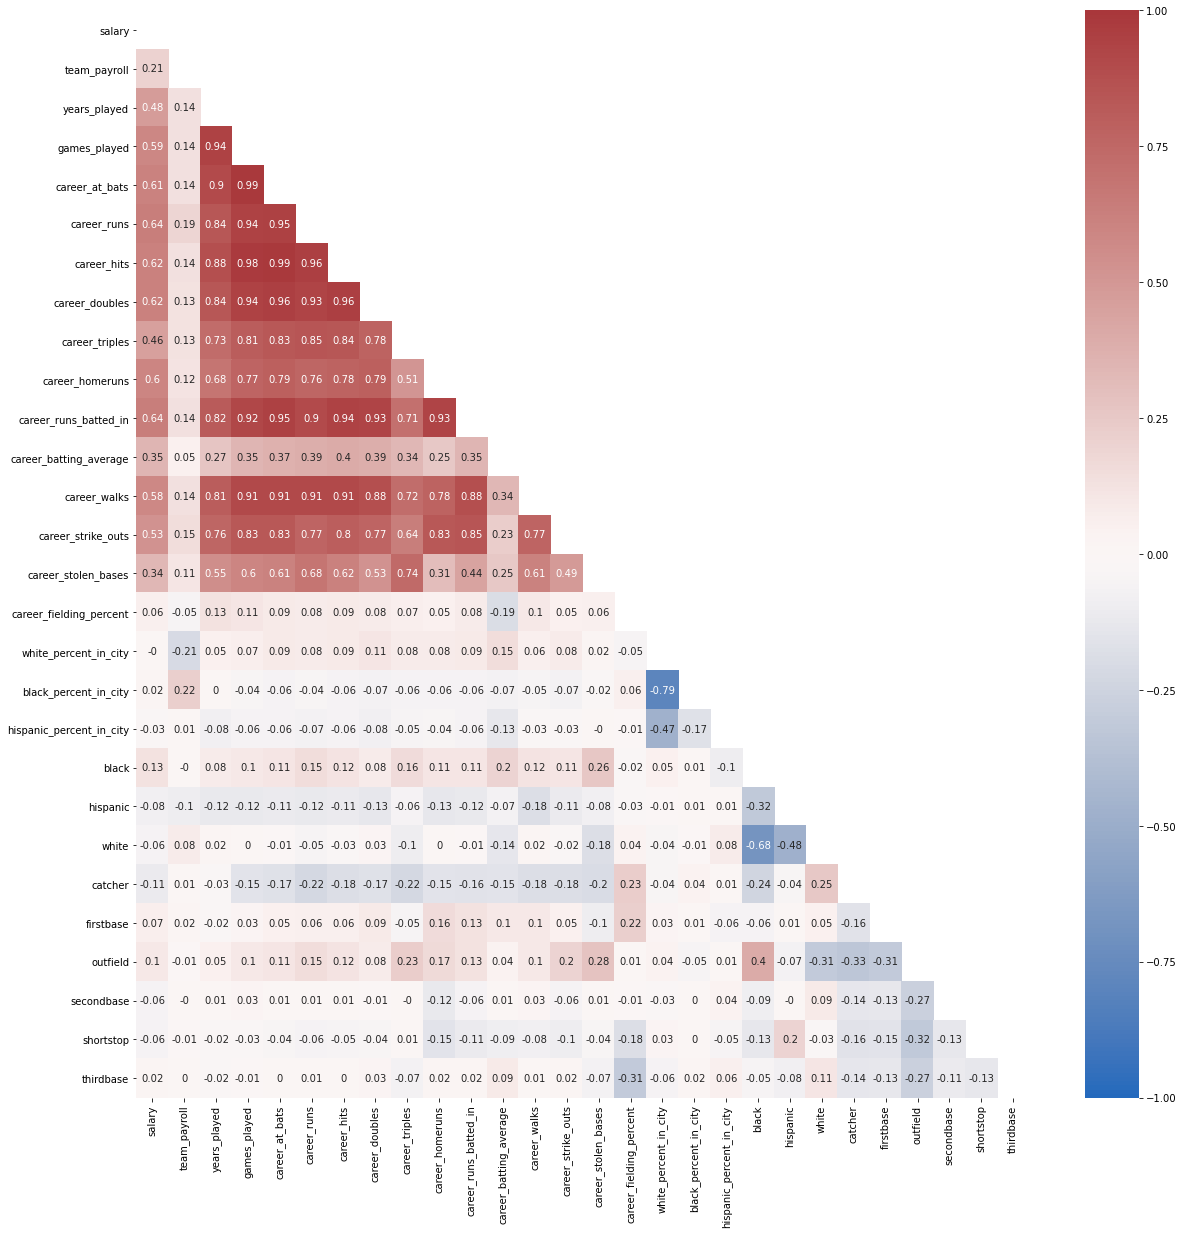

In [36]:
#we can also use heat map to show co relations between different variables
corr_matrix = df.corr().round(2)
#adjusting the size of the graph
graph=plt.figure(figsize=(20,20))
#we are defining datatye of our matrix as boolean.
cap = np.triu(np.ones_like(corr_matrix, dtype=bool))
#here we are calling heatmap and and our calculated co relation matrix values ,
#limitng maximum value to 1 and minimum value to -1
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=cap)
plt.show()

In [37]:
#creating regrssion model including all the independent variables
model=sm.OLS.from_formula("salary~player_position+race+team_payroll+years_played+games_played+\
                          career_at_bats+career_runs+career_hits+career_doubles+career_triples+\
                          career_homeruns+career_runs_batted_in+career_batting_average+career_walks+\
                          career_strike_outs+career_stolen_bases+career_fielding_percent+\
                          white_percent_in_city+black_percent_in_city+hispanic_percent_in_city",data=df).fit()

In [38]:
#displaying summary of model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     12.95
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           7.28e-34
Time:                        01:41:32   Log-Likelihood:                -4998.5
No. Observations:                 329   AIC:                         1.005e+04
Df Residuals:                     304   BIC:                         1.014e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -3.539e+10   1.26e+12     -0.028      0.978   -2.51e+12    2.44e+12
player_position[T.firstbase]  -4.142e+05   2.33e+05     -1.774      0.077   -8.74e+05    4.53e+04
player_position[T.outfield]   -1.892e+05   2.09e+05     -0.905      0.366      -6e+05    2.22e+05
player_position[T.secondbase] -3.695e+05    2.5e+05     -1.481      0.140    -8.6e+05    1.21e+05
player_position[T.shortstop]  -6.847e+04   2.38e+05     -0.288      0.774   -5.36e+05    3.99e+05
player_position[T.thirdbase]  -1.965e+05   2.57e+05     -0.765      0.445   -7.02e+05    3.09e+05
race[T.hispanic]               -4.05e+04   1.77e+05     -0.228      0.820    -3.9e+05    3.09e+05
race[T.white]                  -1.38e+05   1.49e+05     -0.929      0.353    -4.3e+05    1.54e+05
team_payroll                      0.0153      0.007      2.102      0.036       0.001       0.030
years_played                   -1.45e+05   5.98e+04     -2.426      0.016   -2.63e+05   -2.74e+04
games_played                   1017.3041   1300.005      0.783      0.435   -1540.844    3575.452
career_at_bats                   32.6472    506.194      0.064      0.949    -963.440    1028.735
career_runs                    3249.8630    828.461      3.923      0.000    1619.620    4880.106
career_hits                    -625.4328   1548.565     -0.404      0.687   -3672.697    2421.831
career_doubles                 1648.0580   2163.513      0.762      0.447   -2609.298    5905.414
career_triples                 -1.08e+04   6608.381     -1.634      0.103   -2.38e+04    2203.247
career_homeruns                3633.5133   4291.274      0.847      0.398   -4810.847    1.21e+04
career_runs_batted_in           310.0349   2125.775      0.146      0.884   -3873.062    4493.132
career_batting_average         6045.2203   2143.954      2.820      0.005    1826.351    1.03e+04
career_walks                   -626.7452    732.780     -0.855      0.393   -2068.708     815.218
career_strike_outs              -63.8576    411.717     -0.155      0.877    -874.034     746.319
career_stolen_bases            -516.0364   1026.879     -0.503      0.616   -2536.726    1504.654
career_fielding_percent        4938.3182   3310.514      1.492      0.137   -1576.106    1.15e+04
white_percent_in_city          3.538e+08   1.26e+10      0.028      0.978   -2.44e+10    2.51e+10
black_percent_in_city          3.539e+08   1.26e+10      0.028      0.978   -2.44e+10    2.51e+10
hispanic_percent_in_city       3.539e+08   1.26e+10      0.028      0.978   -2.44e+10    2.51e+10
==============================================================================
Omnibus:                       27.800   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.325
Skew

In [42]:
#now we will drop those varibales whose p value is greater than 0.05 and redesign the model
model=sm.OLS.from_formula("salary~team_payroll+years_played+career_at_bats+career_triples+\
career_doubles",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     49.63
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.74e-38
Time:                        01:43:20   Log-Likelihood:                -5020.6
No. Observations:                 329   AIC:                         1.005e+04
Df Residuals:                     323   BIC:                         1.008e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.261e+04   2.38e+05      0.263      0.793   -4.06e+05    5.31e+05
team_payroll       0.0230      0.007      3.279      0.001       0.009       0.037
years_played   -1.247e+05   3.42e+04     -3.647      0.000   -1.92e+05   -5.74e+04
career_at_bats   517.5020    133.748      3.869      0.000     254.375     780.629
career_triples -1.036e+04   4894.459     -2.117      0.035      -2e+04    -734.828
career_doubles  3873.4701   1907.545      2.031      0.043     120.689    7626.251
==============================================================================
Omnibus:                       39.261   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.314
Skew:                           0.818   Prob(JB):                     2.65e-12
Kurtosis:                       4.101   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is our final model where we can see "team_payroll","years_played","career_at_bats","career_doubles","career_triples" are the independent varibles which has major significance on our dependent variable salary


# Our final model is

##### Salary=1.554e+05+0.0212*team_payroll-1.418e+05*years_played+529.2938*career_at_bats+4446.1393*career_doubles-1.101e+04*career_triples

In [40]:
#Graph for residual assumption
graph = figure(height=400, width=950)
residual = model.get_influence().resid_studentized_internal
graph.circle(model.fittedvalues, residual,color="orange")
show(graph)

In [41]:
#To check normality of residuals using histogram
hist, edges = np.histogram(residual, bins=10)
graph = figure(height=400, width=750)
graph.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],line_color="yellow")
show(graph)